<h1><strong>ANÁLISIS DE LOS DATOS

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_json('../Data/processed/data.json')
df.head(10)

,Marca,Modelo,Año,Kilómetros,Combustible,Cilindrada,Potencia (cv),Transmisión,Consumo l/100,Precio
0,Mitsubishi,ASX,2019,47413,Gasolina,1600,117,Manual,6.6,18990
1,Mercedes,B,2019,40800,Diésel,2100,136,Automática,5.3,21990
2,Renault,Captur,2019,62122,Gasolina,900,90,Manual,5.4,12990
3,SEAT,Leon,2022,5338,Gasolina,1500,150,Manual,5.7,20490
4,Peugeot,2008,2021,58885,Diésel,1500,110,Manual,3.6,14490
5,Peugeot,2008,2021,58885,Diésel,1500,110,Manual,3.6,18990
6,Mitsubishi,Cross,2019,70863,Gasolina,1500,163,Automática,8.5,19990
7,Hyundai,i20,2019,70093,Gasolina,1000,100,Manual,5.5,14190
8,Hyundai,i20,2021,16000,Gasolina,1200,84,Manual,5.3,13990
9,Hyundai,i20,2021,16000,Gasolina,1200,84,Manual,5.3,13990


<h4>De cara a entrenar nuestro modelo, debemos preparar los datos para que sean adecuados y permitan un aprendizaje generalizado. La columna de 'Modelo' no nos interesa ya que nuestro modelo aprendería a relacionar el vehículo con el precio y no queremos que eso pase, también la 'Marca' debe ser procesada con cuidado, ya que puede que pase lo mismo, solo que en este caso sí nos interesa que haya alguna referencia a la gama del vehículo.

In [39]:
df = df.drop('Modelo', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4804 entries, 0 to 4807
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Marca          4804 non-null   object 
 1   Año            4804 non-null   int64  
 2   Kilómetros     4804 non-null   int64  
 3   Combustible    4804 non-null   object 
 4   Cilindrada     4804 non-null   int64  
 5   Potencia (cv)  4804 non-null   int64  
 6   Transmisión    4804 non-null   object 
 7   Consumo l/100  4804 non-null   float64
 8   Precio         4804 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 375.3+ KB


In [11]:
df['Marca'].unique()

array(['Mitsubishi', 'Mercedes', 'Renault', 'SEAT', 'Peugeot', 'Hyundai',
       'Kia', 'Volkswagen', 'Fiat', 'Ford', 'Dacia', 'Toyota', 'BMW',
       'Alfa', 'Citroen', 'Jeep', 'Nissan', 'Opel', 'Audi', 'Mazda', 'DS',
       'Lexus', 'Volvo', 'Land', 'Mini', 'Skoda', 'Cupra', 'Suzuki',
       'Honda', 'Ssangyong', 'Smart', 'Infiniti', 'MG', 'Jaguar',
       'Abarth', 'Chevrolet', 'Subaru', 'Porsche', 'Chrysler', 'Maserati'],
      dtype=object)

In [9]:
df['Combustible'].unique()

array(['Gasolina', 'Diésel', 'Híbrido', 'GLP'], dtype=object)

In [10]:
df['Transmisión'].unique()

array(['Manual', 'Automática'], dtype=object)

<h4>Tenemos tres columnas no numéricas para codificar, en el caso de 'Marca' haremos una agrupación por gamas (media, alta y lujo) y luego haremos el encoder por clases para las tres.

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,4804.0,2017.962739,2.254767,2009.0,2016.0,2019.0,2020.00,2023.0
Kilómetros,4804.0,69497.465445,40709.010107,20.0,37449.0,63152.5,97751.25,193045.0
Cilindrada,4804.0,1544.567027,418.305924,900.0,1200.0,1500.0,2000.00,5000.0
Potencia (cv),4804.0,129.361574,42.687528,60.0,100.0,121.0,150.00,510.0
Consumo l/100,4804.0,4.999958,1.033583,1.2,4.3,4.9,5.50,18.5
Precio,4804.0,17035.047669,6246.401793,5490.0,12490.0,15990.0,20490.00,55900.0


<h4>Podemos ver en consumos que puede que haya algunos algo disparados, pero es un consumo posible.

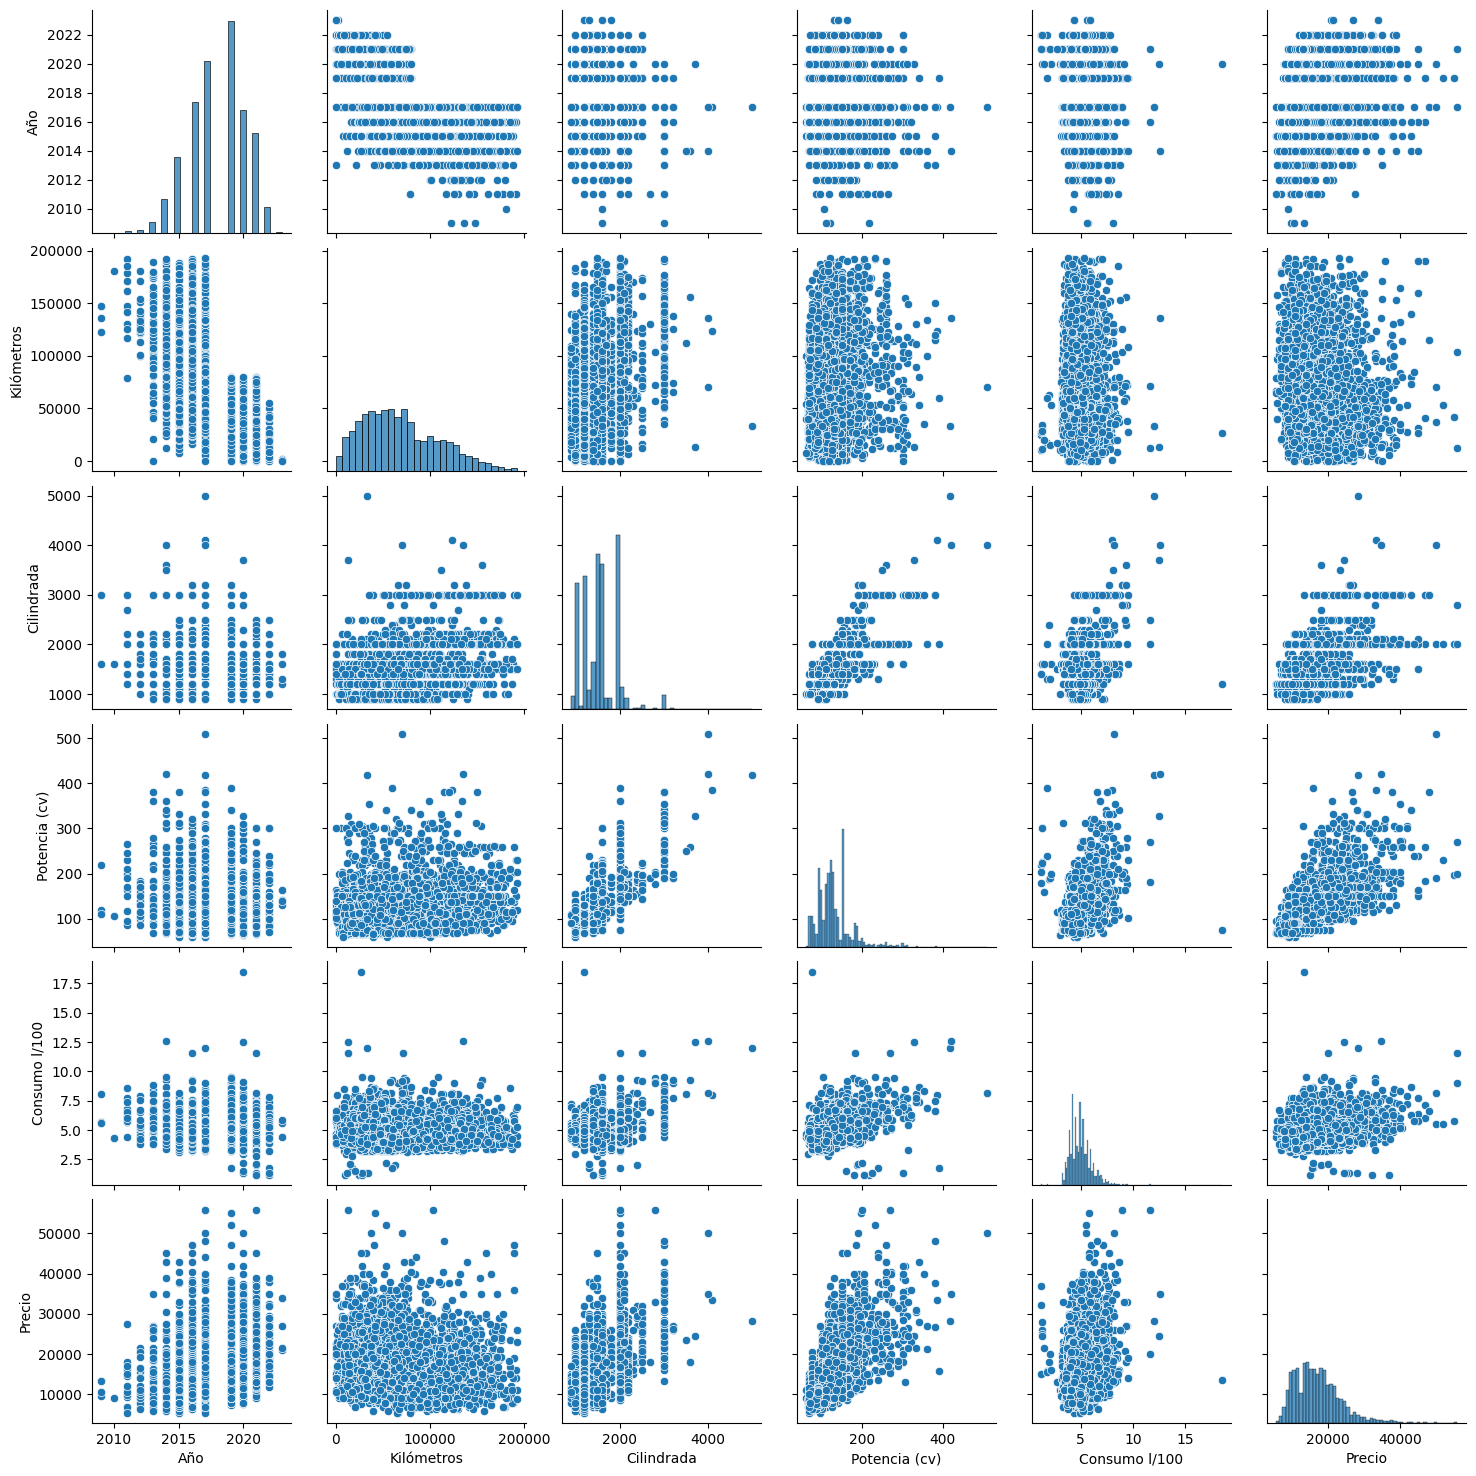

In [19]:
sns.pairplot(data= df)

<h4>En este gráfico observamos que todas las distribuciones son normales y algunas tienen correlación entre ellas, si nos fijamos, hay un valor en consumo que podría ser un outlier. Vamos a aplicar una máscara con el máximo que hemos observado anteriormente:

In [41]:
df[df['Consumo l/100']==18.5]

,Marca,Año,Kilómetros,Combustible,Cilindrada,Potencia (cv),Transmisión,Consumo l/100,Precio
2450,Opel,2020,26226,Gasolina,1200,75,Manual,18.5,13490


<h4>No parece ser un caso real así que lo sacamos del dataset y listo (tenemos sufientes datos):

In [43]:
df = df.drop(index=2450)

<h4>Vamos a ver en profundidad la correlación de los datos:

<Axes: >

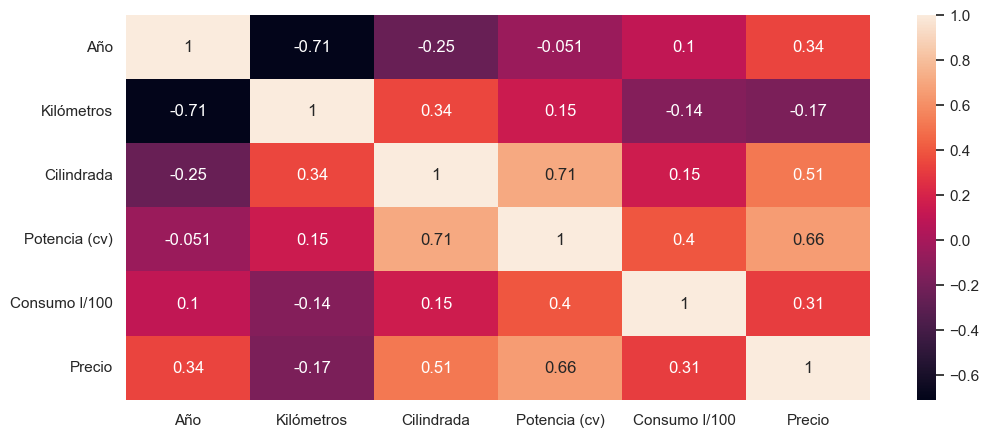

In [46]:
sns.set(rc={'figure.figsize':(12,5)})
df_heat = df.drop(columns=['Marca', 'Combustible', 'Transmisión'])
sns.heatmap(df_heat.corr(), annot=True)

<h4>Podemos observar que los kilómetros no están tan correlacionados como esperábamos con el precio, probablemente debido a la diferencia de precio entre gamas, que de la misma forma afecta a los años; Un coche de lujo seguirá valiendo más que uno de media gama a pesar de tener más kilómetros y antiguedad.

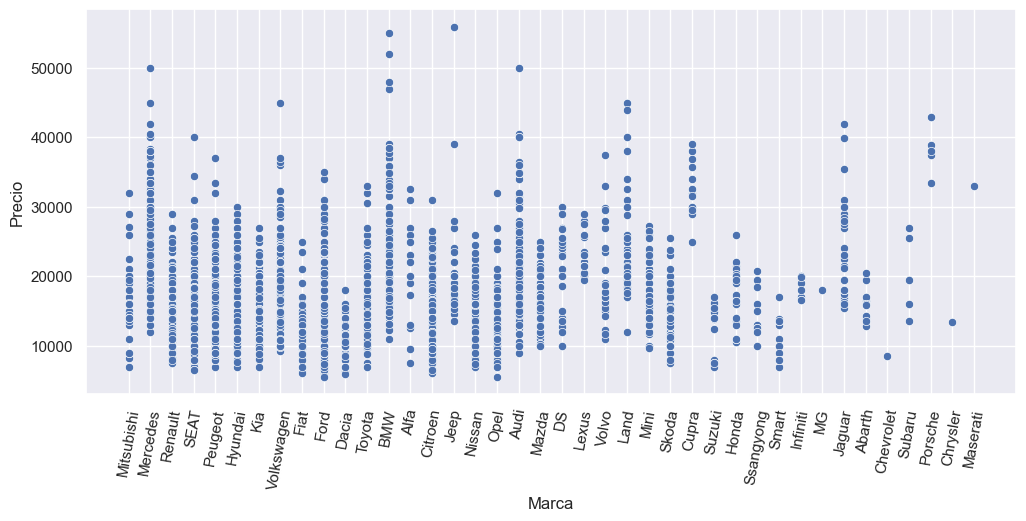

In [44]:
sns.set(rc={'figure.figsize':(12,5)})
sns.scatterplot(df, x= 'Marca', y= 'Precio')
plt.xticks(rotation=80);

<h4>Vamos a clasificar la columna 'Marca' en tres columnas: 'Gama media', 'Gama alta' y 'Gama lujo'.

In [24]:
df.Marca.unique()

array(['Mitsubishi', 'Mercedes', 'Renault', 'SEAT', 'Peugeot', 'Hyundai',
       'Kia', 'Volkswagen', 'Fiat', 'Ford', 'Dacia', 'Toyota', 'BMW',
       'Alfa', 'Citroen', 'Jeep', 'Nissan', 'Opel', 'Audi', 'Mazda', 'DS',
       'Lexus', 'Volvo', 'Land', 'Mini', 'Skoda', 'Cupra', 'Suzuki',
       'Honda', 'Ssangyong', 'Smart', 'Infiniti', 'MG', 'Jaguar',
       'Abarth', 'Chevrolet', 'Subaru', 'Porsche', 'Chrysler', 'Maserati'],
      dtype=object)

In [48]:
mid = ['Citroen','Dacia','Fiat','Ford','Honda','Mitsubishi','Renault','Seat','Peugeot','Hyundai','Kia','Toyota','Nissan','Opel','Mazda',
'Volvo','Skoda','Volvo','Smart','Ssangyong','Mg', 'Suzuki','Subaru']
high = ['Abarth','Alfa Romeo','Audi','Bmw','Mercedes','Mercedes-Benz','Volkswagen','Jeep','Ds','Lexus','Land Rover','Jaguar','Mini','Cupra',
'Infiniti','Chevrolet','Chrysler','Alfa','Land']
luxe = ['Aston Martin','Bentley','Ferrari','Lamborghini','Porsche','Maserati']

Gamas = []
for brand in df.Marca:
    if brand.capitalize() in mid:
        Gamas.append('Gama media')
    elif brand.capitalize() in high:
        Gamas.append('Gama alta')
    elif brand.capitalize() in luxe:
        Gamas.append('Gama lujo')
    else:
        print('No se ha clasificado: ', brand)

In [33]:
len(Gamas)

4804

In [49]:
df['Marca'] = Gamas

In [50]:
df.head(10)

,Marca,Año,Kilómetros,Combustible,Cilindrada,Potencia (cv),Transmisión,Consumo l/100,Precio
0,Gama media,2019,47413,Gasolina,1600,117,Manual,6.6,18990
1,Gama alta,2019,40800,Diésel,2100,136,Automática,5.3,21990
2,Gama media,2019,62122,Gasolina,900,90,Manual,5.4,12990
3,Gama media,2022,5338,Gasolina,1500,150,Manual,5.7,20490
4,Gama media,2021,58885,Diésel,1500,110,Manual,3.6,14490
5,Gama media,2021,58885,Diésel,1500,110,Manual,3.6,18990
6,Gama media,2019,70863,Gasolina,1500,163,Automática,8.5,19990
7,Gama media,2019,70093,Gasolina,1000,100,Manual,5.5,14190
8,Gama media,2021,16000,Gasolina,1200,84,Manual,5.3,13990
9,Gama media,2021,16000,Gasolina,1200,84,Manual,5.3,13990


In [51]:
df.Marca.unique()

array(['Gama media', 'Gama alta', 'Gama lujo'], dtype=object)

<Axes: xlabel='Precio', ylabel='Consumo l/100'>

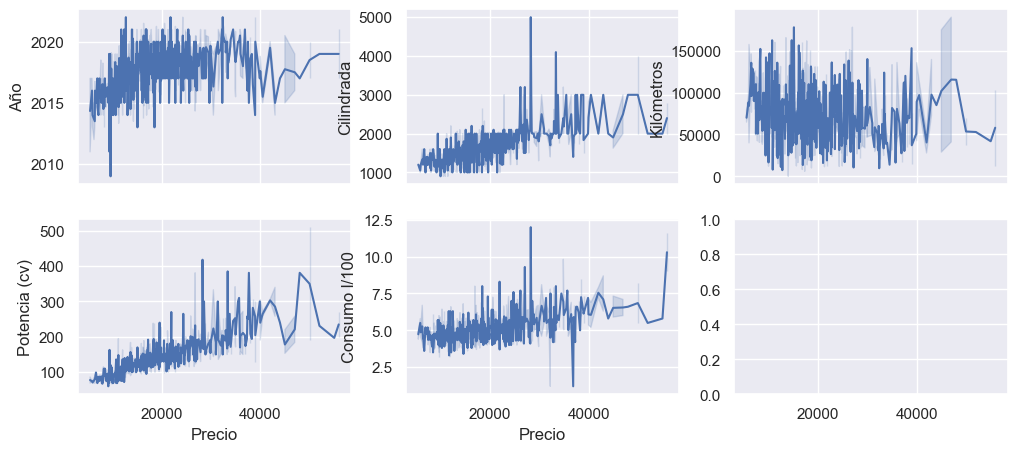

<Figure size 1200x1200 with 0 Axes>

In [62]:
fig, axes = plt.subplots(2,3,sharex=True)
fig = plt.figure(figsize=(12,12))
x = df['Precio']

sns.lineplot(df, x=x, y= df['Año'], ax= axes[0,0])
sns.lineplot(df, x=x, y= df['Cilindrada'], ax= axes[0,1])
sns.lineplot(df, x=x, y= df['Kilómetros'], ax= axes[0,2])
sns.lineplot(df, x=x, y= df['Potencia (cv)'], ax= axes[1,0])
sns.lineplot(df, x=x, y= df['Consumo l/100'], ax= axes[1,1])


<h4>Pasemos a codificar el dataset para empezar a probar modelos:

In [74]:
codata = pd.get_dummies(df, columns= ['Marca', 'Combustible', 'Transmisión'], dtype= int)

In [75]:
codata.head(10)

,Año,Kilómetros,Cilindrada,Potencia (cv),Consumo l/100,Precio,Marca_Gama alta,Marca_Gama lujo,Marca_Gama media,Combustible_Diésel,Combustible_GLP,Combustible_Gasolina,Combustible_Híbrido,Transmisión_Automática,Transmisión_Manual
0,2019,47413,1600,117,6.6,18990,0,0,1,0,0,1,0,0,1
1,2019,40800,2100,136,5.3,21990,1,0,0,1,0,0,0,1,0
2,2019,62122,900,90,5.4,12990,0,0,1,0,0,1,0,0,1
3,2022,5338,1500,150,5.7,20490,0,0,1,0,0,1,0,0,1
4,2021,58885,1500,110,3.6,14490,0,0,1,1,0,0,0,0,1
5,2021,58885,1500,110,3.6,18990,0,0,1,1,0,0,0,0,1
6,2019,70863,1500,163,8.5,19990,0,0,1,0,0,1,0,1,0
7,2019,70093,1000,100,5.5,14190,0,0,1,0,0,1,0,0,1
8,2021,16000,1200,84,5.3,13990,0,0,1,0,0,1,0,0,1
9,2021,16000,1200,84,5.3,13990,0,0,1,0,0,1,0,0,1


In [71]:
codata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 0 to 4807
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     4803 non-null   int64  
 1   Kilómetros              4803 non-null   int64  
 2   Cilindrada              4803 non-null   int64  
 3   Potencia (cv)           4803 non-null   int64  
 4   Consumo l/100           4803 non-null   float64
 5   Precio                  4803 non-null   int64  
 6   Marca_Gama alta         4803 non-null   int32  
 7   Marca_Gama lujo         4803 non-null   int32  
 8   Marca_Gama media        4803 non-null   int32  
 9   Combustible_Diésel      4803 non-null   int32  
 10  Combustible_GLP         4803 non-null   int32  
 11  Combustible_Gasolina    4803 non-null   int32  
 12  Combustible_Híbrido     4803 non-null   int32  
 13  Transmisión_Automática  4803 non-null   int32  
 14  Transmisión_Manual      4803 non-null   int32

<h4>Guardamos el conjunto de datos para empezar a tratar modelos de ML.

In [77]:
codata.to_json('../Data/processed/data_ml.json')